# Artificial Neural Network Classifier

## Imports

In [1]:
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

import keras
from keras import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.layers import Dropout, Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras import regularizers
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')
random_state = 27

Using TensorFlow backend.


## Scripts

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py
%run ../util/PlotLosses.py

# Load the data

In [3]:
data = load_data("../../Data", False)
X = data['train_data'][data['numerical_attributes'] + data['categorical_attributes']]
y = data['train_data'][data['target']]

# Scale it before training

In [4]:
scaler = MinMaxScaler()
scaler.fit(X[data['numerical_attributes']])
X[data['numerical_attributes']] = scaler.transform(X[data['numerical_attributes']])

E:\Anaconda\envs\Homework3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Build neural network model

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(54, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(7, activation='relu'))

print(model.summary())
optimizer2 = Adam(lr=0.01, decay=1e-2)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer2,
              metrics=['accuracy'])
print("Done building nn..")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1760      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 91        
Total params: 2,855
Trainable params: 2,855
Non-trainable params: 0
_________________________________________________________________
None
Done building nn..


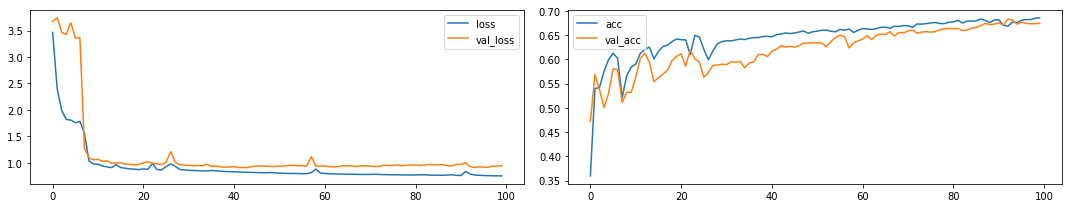

In [13]:
plot_losses = PlotLosses()
checkpointer = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)
model.fit(X,
          to_categorical(y-1),
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_split=0.1,
          shuffle=True,
          callbacks=[checkpointer, plot_losses])

In [14]:
model = load_model('model.h5')
model.evaluate(X, to_categorical(y-1))

12234/12234 [==============================] - 1s 91us/step


[0.83011559298445, 0.6474579042208941]

In [15]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

y_predicted_total = [None] * len(X)

fold_no = 0
for train_index, test_index in skf.split(X, y):
    fold_no = fold_no + 1
    print("Fold %s" % (fold_no))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer2,
              metrics=['accuracy'])
    
    model.fit(X_train,
          to_categorical(y_train-1),
          batch_size=128,
          epochs=50,
          shuffle=True,
          callbacks=[checkpointer])
    
    model = load_model('model.h5')
    
    y_predicted = model.predict(X_test).tolist()
    for idx, index in enumerate(test_index):
        y_predicted_total[index] = y_predicted[idx]

Fold 1
Epoch 1/50
11007/11007 [==============================] - 2s 152us/step - loss: 0.8443 - acc: 0.6501
Epoch 2/50
11007/11007 [==============================] - 1s 55us/step - loss: 0.8241 - acc: 0.6623
Epoch 3/50
11007/11007 [==============================] - 1s 46us/step - loss: 0.8272 - acc: 0.6626
Epoch 4/50
11007/11007 [==============================] - 1s 49us/step - loss: 0.8221 - acc: 0.6578
Epoch 5/50
11007/11007 [==============================] - 1s 91us/step - loss: 0.8102 - acc: 0.6646
Epoch 6/50
11007/11007 [==============================] - 1s 107us/step - loss: 0.8087 - acc: 0.6641
Epoch 7/50
11007/11007 [==============================] - 1s 105us/step - loss: 0.8066 - acc: 0.6649
Epoch 8/50
11007/11007 [==============================] - 1s 60us/step - loss: 0.8040 - acc: 0.6642
Epoch 9/50
11007/11007 [==============================] - 1s 48us/step - loss: 0.8014 - acc: 0.6670
Epoch 10/50
11007/11007 [==============================] - 0s 42us/step - loss: 0.7999 - a

11007/11007 [==============================] - 0s 44us/step - loss: 0.7851 - acc: 0.6797
Epoch 33/50
11007/11007 [==============================] - 0s 44us/step - loss: 0.7837 - acc: 0.6789
Epoch 34/50
11007/11007 [==============================] - 0s 43us/step - loss: 0.7826 - acc: 0.6791
Epoch 35/50
11007/11007 [==============================] - 1s 49us/step - loss: 0.7815 - acc: 0.6797
Epoch 36/50
11007/11007 [==============================] - 1s 52us/step - loss: 0.7806 - acc: 0.6803
Epoch 37/50
11007/11007 [==============================] - 1s 56us/step - loss: 0.7808 - acc: 0.6812
Epoch 38/50
11007/11007 [==============================] - 1s 48us/step - loss: 0.7794 - acc: 0.6812
Epoch 39/50
11007/11007 [==============================] - 0s 44us/step - loss: 0.7778 - acc: 0.6808
Epoch 40/50
11007/11007 [==============================] - 1s 60us/step - loss: 0.7774 - acc: 0.6816
Epoch 41/50
11007/11007 [==============================] - 0s 44us/step - loss: 0.7784 - acc: 0.6789
Ep

11009/11009 [==============================] - 1s 47us/step - loss: 0.7988 - acc: 0.6595
Epoch 13/50
11009/11009 [==============================] - 0s 45us/step - loss: 0.7978 - acc: 0.6601
Epoch 14/50
11009/11009 [==============================] - 1s 46us/step - loss: 0.7970 - acc: 0.6607
Epoch 15/50
11009/11009 [==============================] - 1s 54us/step - loss: 0.7962 - acc: 0.6609
Epoch 16/50
11009/11009 [==============================] - 1s 51us/step - loss: 0.7953 - acc: 0.6614
Epoch 17/50
11009/11009 [==============================] - 0s 44us/step - loss: 0.7947 - acc: 0.6624
Epoch 18/50
11009/11009 [==============================] - 1s 53us/step - loss: 0.7940 - acc: 0.6620
Epoch 19/50
11009/11009 [==============================] - 1s 45us/step - loss: 0.7933 - acc: 0.6620
Epoch 20/50
11009/11009 [==============================] - 1s 47us/step - loss: 0.7914 - acc: 0.6625
Epoch 21/50
11009/11009 [==============================] - 1s 48us/step - loss: 0.7901 - acc: 0.6631
Ep

11011/11011 [==============================] - 1s 48us/step - loss: 0.7849 - acc: 0.6669
Epoch 44/50
11011/11011 [==============================] - 0s 44us/step - loss: 0.7860 - acc: 0.6674
Epoch 45/50
11011/11011 [==============================] - 0s 45us/step - loss: 0.7841 - acc: 0.6672
Epoch 46/50
11011/11011 [==============================] - 1s 46us/step - loss: 0.7834 - acc: 0.6668
Epoch 47/50
11011/11011 [==============================] - 1s 46us/step - loss: 0.7830 - acc: 0.6674
Epoch 48/50
11011/11011 [==============================] - 1s 47us/step - loss: 0.7827 - acc: 0.6667
Epoch 49/50
11011/11011 [==============================] - 1s 47us/step - loss: 0.7822 - acc: 0.6685
Epoch 50/50
11011/11011 [==============================] - 1s 48us/step - loss: 0.7818 - acc: 0.6688
Fold 6
Epoch 1/50
11011/11011 [==============================] - 2s 208us/step - loss: 0.8297 - acc: 0.6545
Epoch 2/50
11011/11011 [==============================] - 1s 47us/step - loss: 0.8226 - acc: 0.6

11013/11013 [==============================] - 1s 48us/step - loss: 0.8127 - acc: 0.6544
Epoch 24/50
11013/11013 [==============================] - 1s 52us/step - loss: 0.8120 - acc: 0.6546
Epoch 25/50
11013/11013 [==============================] - 1s 46us/step - loss: 0.8114 - acc: 0.6543
Epoch 26/50
11013/11013 [==============================] - 1s 54us/step - loss: 0.8107 - acc: 0.6549
Epoch 27/50
11013/11013 [==============================] - 1s 48us/step - loss: 0.8101 - acc: 0.6553
Epoch 28/50
11013/11013 [==============================] - 1s 51us/step - loss: 0.8097 - acc: 0.6566
Epoch 29/50
11013/11013 [==============================] - 1s 46us/step - loss: 0.8089 - acc: 0.6568
Epoch 30/50
11013/11013 [==============================] - 1s 49us/step - loss: 0.8085 - acc: 0.6575
Epoch 31/50
11013/11013 [==============================] - 1s 53us/step - loss: 0.8078 - acc: 0.6570
Epoch 32/50
11013/11013 [==============================] - 1s 51us/step - loss: 0.8072 - acc: 0.6582
Ep

11014/11014 [==============================] - 1s 55us/step - loss: 0.8168 - acc: 0.6580
Epoch 5/50
11014/11014 [==============================] - 1s 53us/step - loss: 0.8148 - acc: 0.6577
Epoch 6/50
11014/11014 [==============================] - 1s 54us/step - loss: 0.8136 - acc: 0.6583
Epoch 7/50
11014/11014 [==============================] - 1s 55us/step - loss: 0.8126 - acc: 0.6591
Epoch 8/50
11014/11014 [==============================] - 1s 59us/step - loss: 0.8113 - acc: 0.6605
Epoch 9/50
11014/11014 [==============================] - 1s 57us/step - loss: 0.8101 - acc: 0.6594
Epoch 10/50
11014/11014 [==============================] - 1s 52us/step - loss: 0.8092 - acc: 0.6589
Epoch 11/50
11014/11014 [==============================] - 1s 53us/step - loss: 0.8084 - acc: 0.6597
Epoch 12/50
11014/11014 [==============================] - 1s 53us/step - loss: 0.8075 - acc: 0.6597
Epoch 13/50
11014/11014 [==============================] - 1s 52us/step - loss: 0.8071 - acc: 0.6598
Epoch 1

11014/11014 [==============================] - 1s 55us/step - loss: 0.7990 - acc: 0.6584
Epoch 35/50
11014/11014 [==============================] - 1s 54us/step - loss: 0.7983 - acc: 0.6588
Epoch 36/50
11014/11014 [==============================] - 1s 54us/step - loss: 0.7979 - acc: 0.6584
Epoch 37/50
11014/11014 [==============================] - 1s 47us/step - loss: 0.7975 - acc: 0.6584
Epoch 38/50
11014/11014 [==============================] - 1s 48us/step - loss: 0.7971 - acc: 0.6586
Epoch 39/50
11014/11014 [==============================] - 1s 48us/step - loss: 0.7966 - acc: 0.6592
Epoch 40/50
11014/11014 [==============================] - 1s 48us/step - loss: 0.7963 - acc: 0.6591
Epoch 41/50
11014/11014 [==============================] - 1s 50us/step - loss: 0.7959 - acc: 0.6593
Epoch 42/50
11014/11014 [==============================] - 1s 48us/step - loss: 0.7954 - acc: 0.6597
Epoch 43/50
11014/11014 [==============================] - 1s 80us/step - loss: 0.7950 - acc: 0.6598
Ep

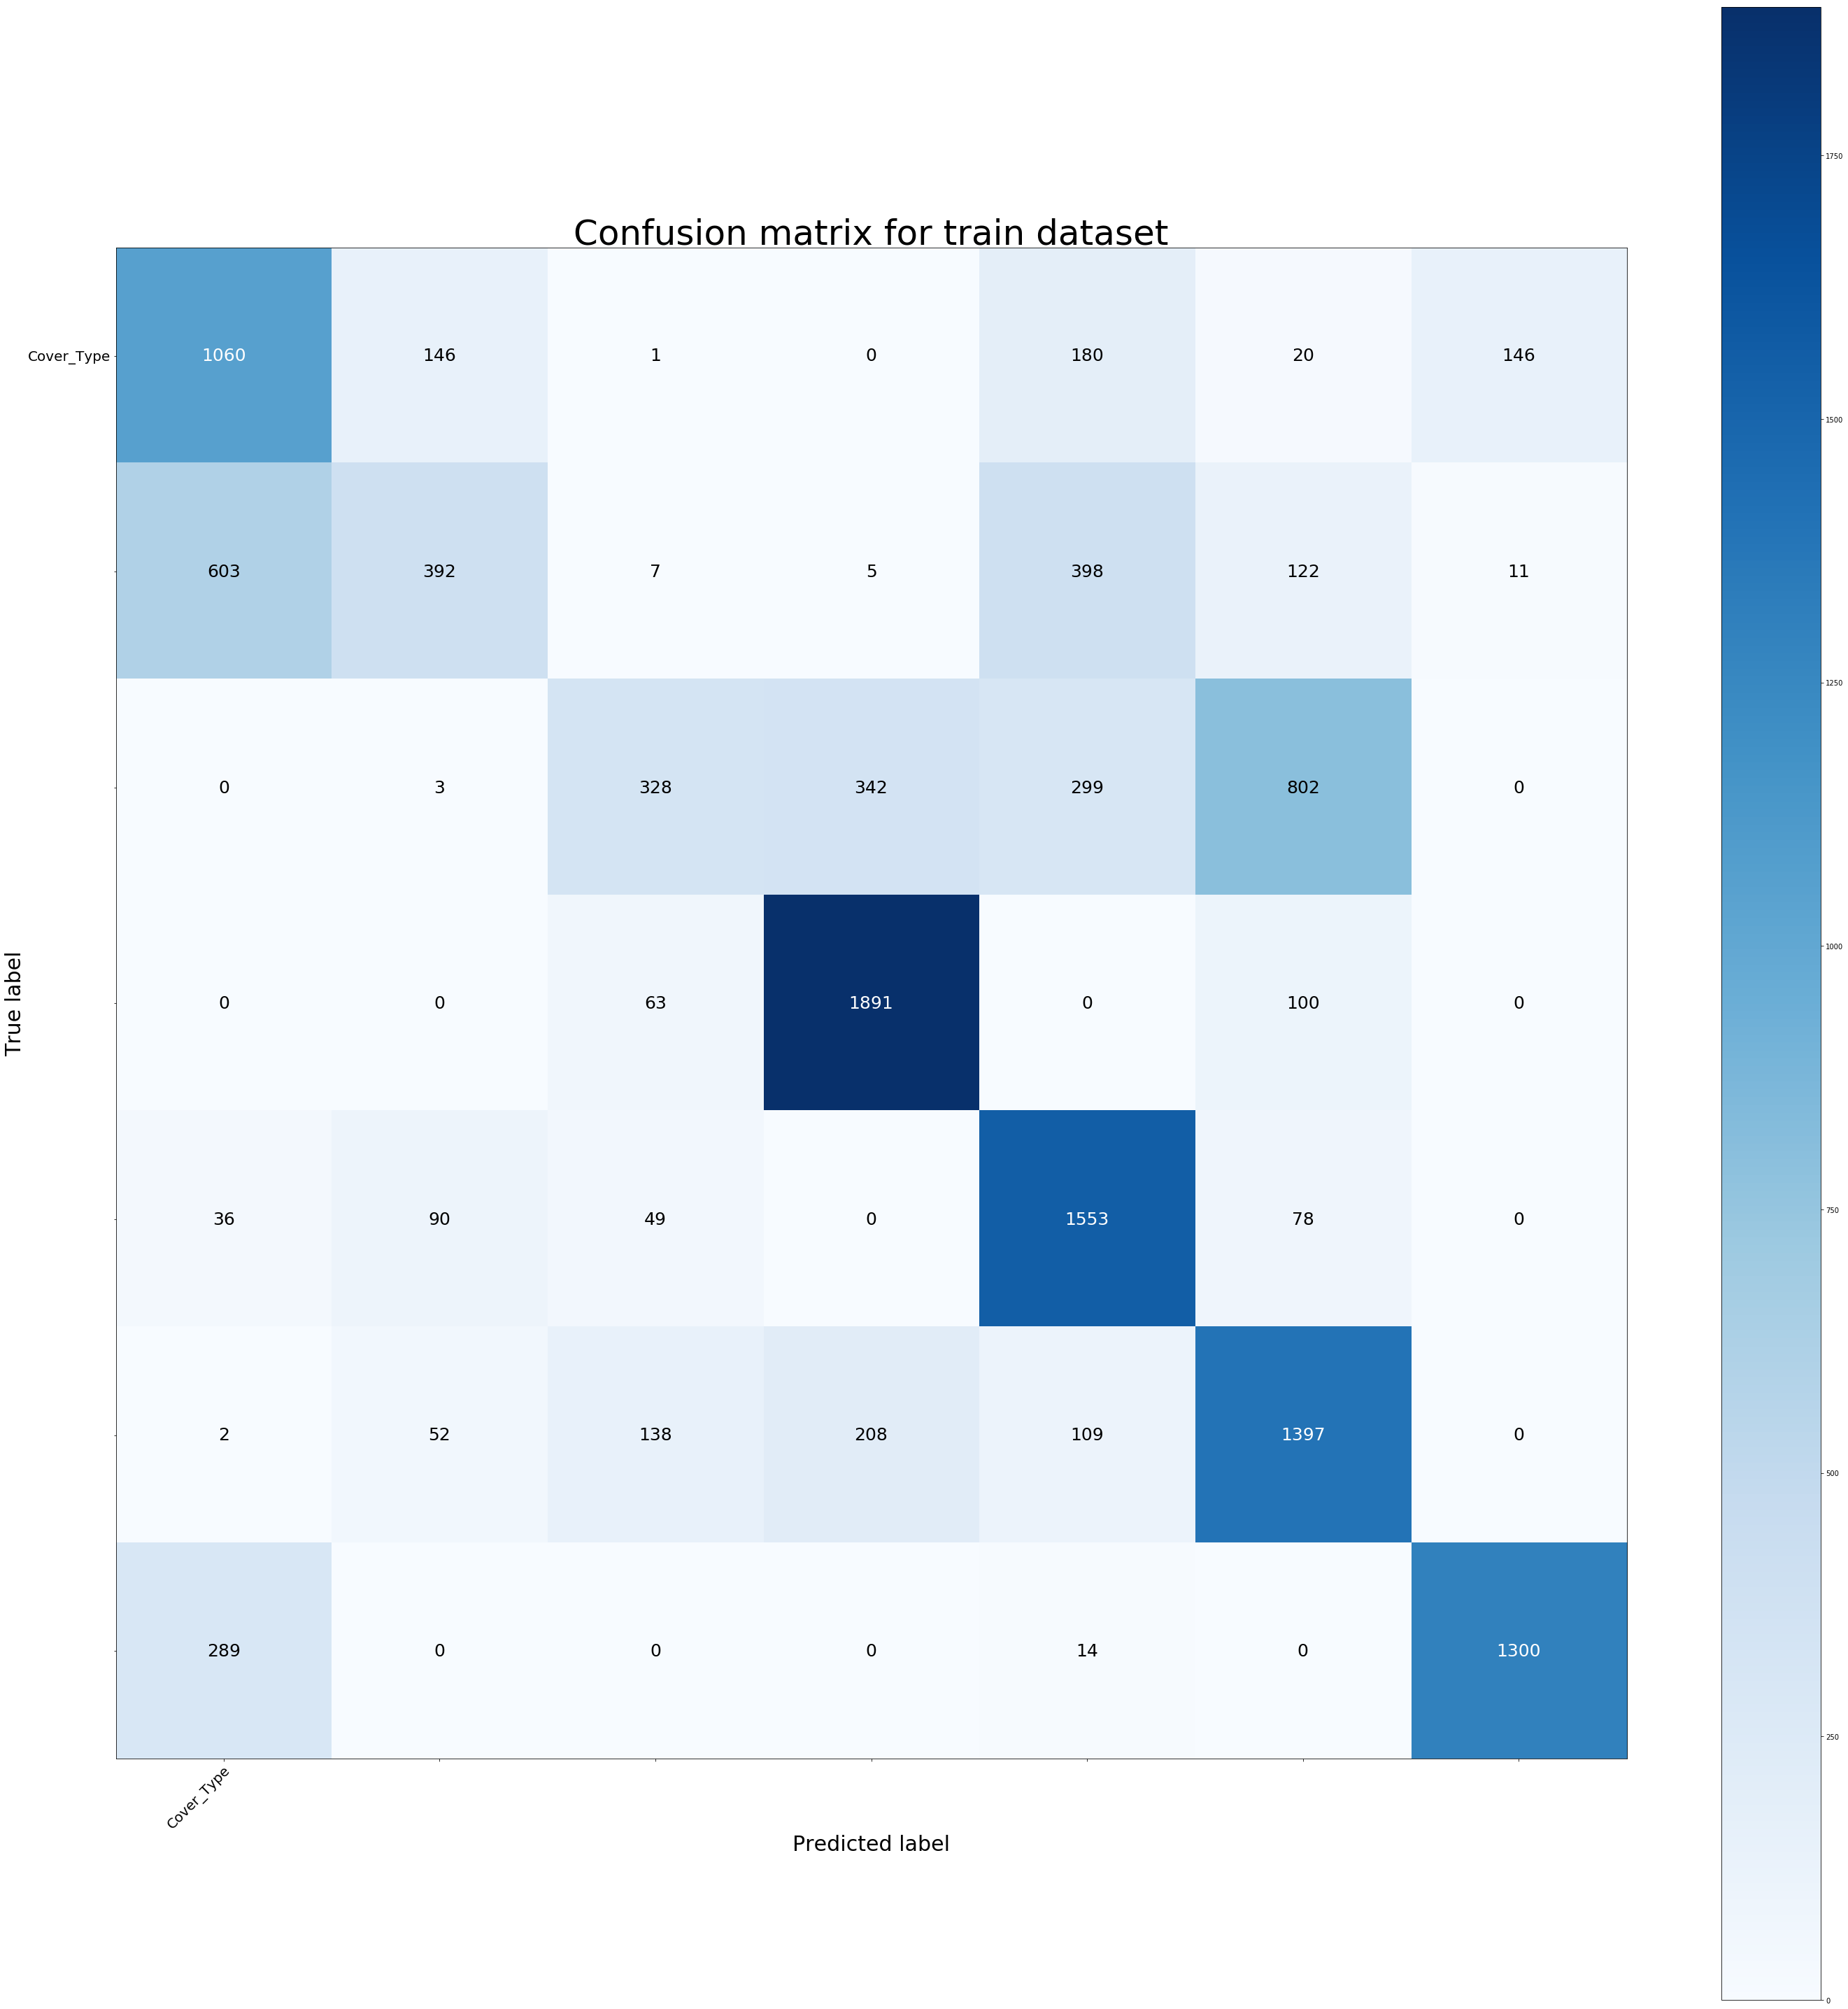

In [16]:
plot_confusion_matrix(y-1, np.argmax(y_predicted_total, axis=1), classes=list(set(y[data['target']])),
                  title='Confusion matrix for train dataset')

In [17]:
target_names = ['Class ' + str(index) for index in list(set(y[data['target'][0]].tolist()))]
print(classification_report(y-1, np.argmax(y_predicted_total, axis=1), target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.53      0.68      0.60      1553
     Class 2       0.57      0.25      0.35      1538
     Class 3       0.56      0.18      0.28      1774
     Class 4       0.77      0.92      0.84      2054
     Class 5       0.61      0.86      0.71      1806
     Class 6       0.55      0.73      0.63      1906
     Class 7       0.89      0.81      0.85      1603

   micro avg       0.65      0.65      0.65     12234
   macro avg       0.64      0.64      0.61     12234
weighted avg       0.64      0.65      0.62     12234

